# Linear Regression

## Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtaining the data

In [11]:
data = pd.read_csv('../../Data/housing_clean.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [12]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
label = 'median_house_value'

### Min-max scaling

In [14]:
for feature in data.columns:
    if feature == label : continue

    data[feature] = (data[feature] - data[feature].min())/(data[feature].max() - data[feature].min())

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0.75


In [16]:
train_data = data[:int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]

In [17]:
train_data_X = train_data.drop(label,axis=1)
train_data_Y = train_data[label]
test_data_X = test_data.drop(label,axis=1)
test_data_Y = test_data[label]

## Defining the model

#### Notations

$$\large b \rightarrow \text{Bias value}$$

$$\large W \rightarrow \text{Weight vector}$$

$$\large \hat y \rightarrow \text{Model output}$$

#### Forward Pass

$$\large \hat y = W \cdot x + b$$

$$\large \mathcal{L} = \frac{1}{N}\sum_{i=1}^N (y_i - \hat y_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - W \cdot x + b)^2$$

#### Backward Pass

$$\large \boxed{\frac{\partial \mathcal{L}}{\partial W} = -2\sum\limits_{i=1}^N (y_i - \hat y_i)x}$$

$$\large \boxed{\frac{\partial \mathcal{L}}{\partial b} = -2\sum\limits_{i=1}^N (y_i - \hat y_i)}$$

In [18]:
class Linear:
    def __init__(self, dim):
        self.dim = dim
        self.w = np.random.random((self.dim, 1))
        self.b = np.random.random()
        
    def forward (self, x):
        return np.dot(x,self.w) + self.b

    def backward(self,X, y, y_pred, learning_rate = 0.001, ridge_lambda = 0 , lasso_lambda = 0):
        self.w -= learning_rate*2*np.dot(X.T, (y_pred - y))/len(y) + 2*ridge_lambda*self.w + 2*lasso_lambda*np.sign(self.w)
        self.b -= learning_rate*2*np.mean(y_pred - y)
        return np.mean((y - y_pred)**2)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

## Simple Linear Regression

Epoch : 2000 MSE Loss : 5590550737.723591
Epoch : 4000 MSE Loss : 5391299618.83231
Epoch : 6000 MSE Loss : 5291861021.599139
Epoch : 8000 MSE Loss : 5228538659.745218
Epoch : 10000 MSE Loss : 5181158051.7391205
Epoch : 12000 MSE Loss : 5142850981.432642
Epoch : 14000 MSE Loss : 5110896439.698963
Epoch : 16000 MSE Loss : 5083926988.088288
Epoch : 18000 MSE Loss : 5061067337.57974
Epoch : 20000 MSE Loss : 5041660862.603106


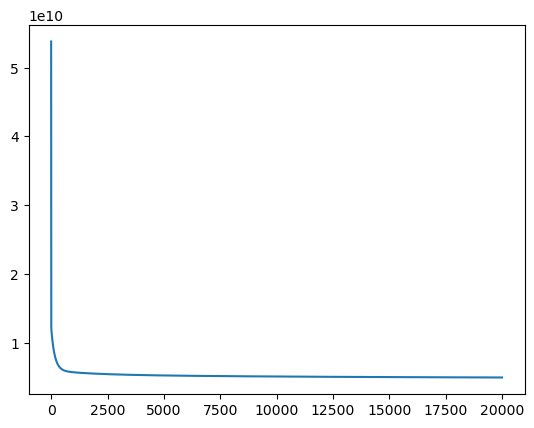

In [19]:
num_feats = len(train_data_X.columns)
linear = Linear(num_feats)

loss_list = []
epochs = 20000
lr = 0.1

X = train_data_X.values
y_true = train_data_Y.values.reshape(-1, 1)

for epoch in range(epochs):
    if ((epoch+1)%(epochs/10)==0): print("Epoch :",epoch+1, "MSE Loss :", loss)
    y_pred = linear.forward(X)
    loss = linear.backward(X, y_true, y_pred, lr)
    loss_list.append(loss)

plt.plot(loss_list)
plt.show()

### Evaluation of simple linear regression

In [20]:
X = test_data_X.values
y_pred = linear.forward(X)
y_true = test_data_Y.values.reshape(-1,1)

print("Test MAE :",calculate_mae(y_true,y_pred))

X = train_data_X.values
y_pred = linear.forward(X)
y_true = train_data_Y.values.reshape(-1, 1)

print("Train MAE :",calculate_mae(y_true,y_pred))

Test MAE : 49625.833608278925
Train MAE : 51999.73267800964


## Linear Regression with Ridge

Epoch : 2000 MSE Loss : 5595737930.53319
Epoch : 4000 MSE Loss : 5402431000.77982
Epoch : 6000 MSE Loss : 5307805377.528277
Epoch : 8000 MSE Loss : 5249131374.585303
Epoch : 10000 MSE Loss : 5206639325.904391
Epoch : 12000 MSE Loss : 5173354967.577081
Epoch : 14000 MSE Loss : 5146326165.44188
Epoch : 16000 MSE Loss : 5123991837.391803
Epoch : 18000 MSE Loss : 5105355791.885985
Epoch : 20000 MSE Loss : 5089703692.724942


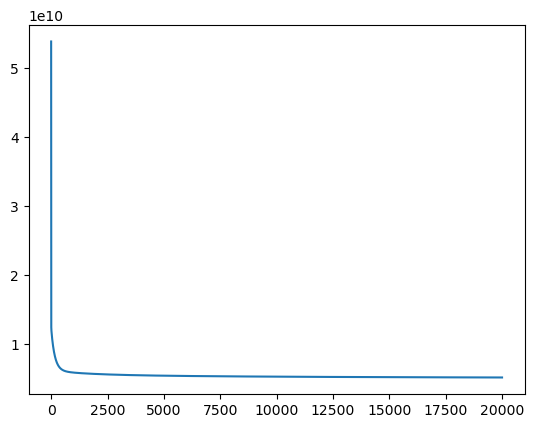

In [21]:
num_feats = len(train_data_X.columns)
linear = Linear(num_feats)

loss_list = []
epochs = 20000
lr = 0.1
rlr = 0.00001

X = train_data_X.values
y_true = train_data_Y.values.reshape(-1, 1)

for epoch in range(epochs):
    if ((epoch+1)%(epochs/10)==0): print("Epoch :",epoch+1, "MSE Loss :", loss)
    y_pred = linear.forward(X)
    loss = linear.backward(X, y_true, y_pred, lr, ridge_lambda = rlr)
    loss_list.append(loss)

plt.plot(loss_list)
plt.show()

### Evaluation of linear regression with ridge

In [22]:
X = test_data_X.values
y_pred = linear.forward(X)
y_true = test_data_Y.values.reshape(-1,1)

print("Test MAE with ridge :",calculate_mae(y_true,y_pred))

X = train_data_X.values
y_pred = linear.forward(X)
y_true = train_data_Y.values.reshape(-1, 1)

print("Train MAE with ridge :",calculate_mae(y_true,y_pred))

Test MAE with ridge : 49710.73692224013
Train MAE with ridge : 52285.60393884826


## Linear Regression with Lasso

Epoch : 2000 MSE Loss : 5590596091.031288
Epoch : 4000 MSE Loss : 5391376478.406605
Epoch : 6000 MSE Loss : 5291957842.485355
Epoch : 8000 MSE Loss : 5228648242.277327
Epoch : 10000 MSE Loss : 5181276966.620405
Epoch : 12000 MSE Loss : 5142976681.586947
Epoch : 14000 MSE Loss : 5111026433.854966
Epoch : 16000 MSE Loss : 5084059116.090803
Epoch : 18000 MSE Loss : 5061199750.418493
Epoch : 20000 MSE Loss : 5041792024.573163


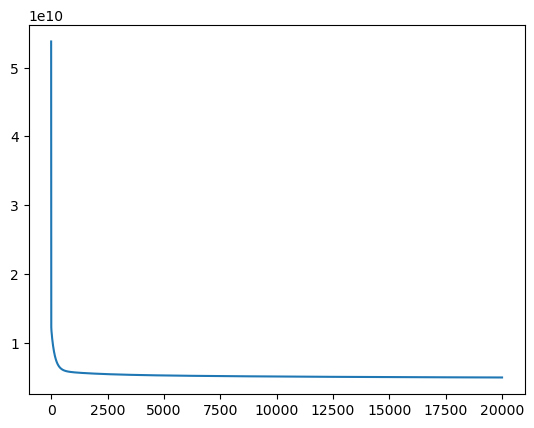

In [23]:
num_feats = len(train_data_X.columns)
linear = Linear(num_feats)

loss_list = []
epochs = 20000
lr = 0.1
llr = 0.01

X = train_data_X.values
y_true = train_data_Y.values.reshape(-1, 1)

for epoch in range(epochs):
    if ((epoch+1)%(epochs/10)==0): print("Epoch :",epoch+1, "MSE Loss :", loss)
    y_pred = linear.forward(X)
    loss = linear.backward(X, y_true, y_pred, lr, lasso_lambda = llr)
    loss_list.append(loss)

plt.plot(loss_list)
plt.show()

### Evaluation of linear regression with lasso

In [24]:
X = test_data_X.values
y_pred = linear.forward(X)
y_true = test_data_Y.values.reshape(-1,1)

print("Test MAE with lasso :",calculate_mae(y_true,y_pred))

X = train_data_X.values
y_pred = linear.forward(X)
y_true = train_data_Y.values.reshape(-1, 1)

print("Train MAE with lasso :",calculate_mae(y_true,y_pred))

Test MAE with lasso : 49626.05580059294
Train MAE with lasso : 52000.57218516235
